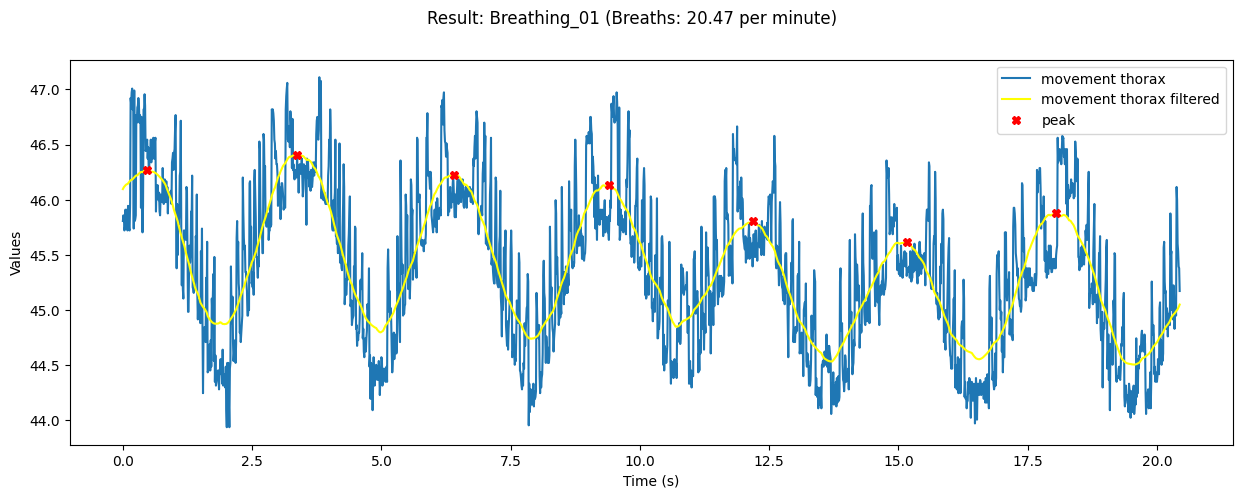

In [23]:
import pandas as pd
from scipy import signal
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import numpy as np

# Read file
data = pd.read_csv('v2_atmung_3.csv')

# X, Y, Z-Werte aus der CSV-Datei extrahieren
d_values = data['D']

# Künstliche Zeitreihe erstellen
time_series = np.arange(len(data)) * 0.01  # 10 Millisekunden pro Eintrag

sgf = signal.savgol_filter(d_values, window_length=250, polyorder=2, mode="nearest")
peaks, _ = find_peaks(sgf,  height=45.25, distance=125)

# Zeitdifferenzen zwischen aufeinanderfolgenden Peaks auf der künstlichen Zeitreihe berechnen
time_diffs = np.diff(time_series[peaks])

# Atemzüge pro Minute berechnen
breaths = 60 / np.mean(time_diffs)

# Create a figure and set its size to 15x5 in.
fig, ax2 = plt.subplots(figsize=(15,5))
fig.suptitle(f'Result: Breathing_01 (Breaths: {breaths:.2f} per minute)')

# Plot a line chart
ax2.plot(time_series, d_values, label='movement thorax')
ax2.plot(time_series, sgf, label='movement thorax filtered', color="yellow")
ax2.plot(time_series[peaks], sgf[peaks], 'X', label='peak', color='red')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Values')
ax2.legend()

# Show plot
plt.show()

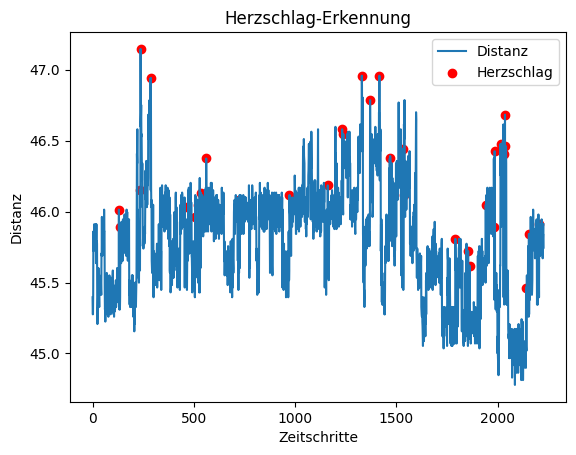

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

def detect_heartbeats(data, threshold=0.5):
    """
    Erkennt Herzschläge in den eingelesenen Daten basierend auf einem Schwellenwert.
    """
    heartbeats = []
    for i in range(1, len(data)):
        if data[i] - data[i-1] > threshold:
            heartbeats.append(i)
    return heartbeats

def plot_heartbeats(data, heartbeats):
    """
    Visualisiert die eingelesenen Daten und markiert die erkannten Herzschläge.
    """
    plt.plot(data, label='Distanz')
    plt.scatter(heartbeats, [data[i] for i in heartbeats], color='red', label='Herzschlag')
    plt.title('Herzschlag-Erkennung')
    plt.xlabel('Zeitschritte')
    plt.ylabel('Distanz')
    plt.legend()
    plt.show()

# CSV-Datei einlesen
file_path = 'v2_herz_2.csv'
df = pd.read_csv(file_path)

# Annahme: Die Spalte 'D' enthält die Distanzwerte
distance_data = df['D']

# Herzschläge erkennen
heartbeats_indices = detect_heartbeats(distance_data)

# Daten visualisieren
plot_heartbeats(distance_data, heartbeats_indices)